# [データサイエンティスト養成読本](https://www.amazon.co.jp/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E9%A4%8A%E6%88%90%E8%AA%AD%E6%9C%AC-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E5%85%A5%E9%96%80%E7%B7%A8-Software-Design-plus/dp/4774176311/ref=pd_sbs_14_4/356-1722932-6741318?_encoding=UTF8&pd_rd_i=4774176311&pd_rd_r=88f1acad-987d-4e75-aee0-764497c87675&pd_rd_w=AKKLK&pd_rd_wg=lMdtz&pf_rd_p=74dba523-b490-4864-923d-51639f6a935f&pf_rd_r=0VFVA17V6K97Q8ZQPWYC&psc=1&refRID=0VFVA17V6K97Q8ZQPWYC)

1. MLライブラリの復習
2. ユーザベース協調フィルタリング

## 1. MLライブラリの復習

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
%matplotlib inline

In [2]:
x = list(range(10))
y = list(range(100, 110))

a = np.array([x, y])
a

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]])

In [3]:
d = ds.make_regression(100, 1, noise=20)

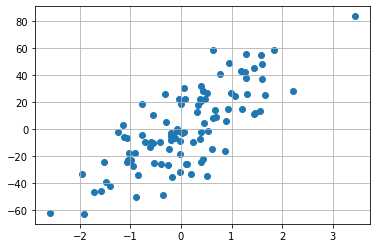

In [4]:
plt.scatter(d[0], d[1])
plt.grid()
plt.show()

## 2. ユーザベース協調フィルタリング（メモリベース）

In [5]:
from scipy.spatial.distance import cosine

In [6]:
def calc_distance(u_index, u_matrix):
    """ユーザベース協調フィルタリング"""

    # user_iの評価値ベクトル
    ratings = u_matrix[u_index]
    # 最後の推薦で扱う、itemと同じ次元数の推薦ベクトルを定義
    similarity = np.zeros(len(ratings))

    # user_iと、各userの評価値ベクトルからコサイン類似度を求める
    for c_index in range(len(u_matrix)):
        # user_cの評価値べクトル
        compare_ratings = u_matrix[c_index]
        # c_indexがuser_iと同じindexの場合、計算しない
        if u_index == c_index:
            continue
        # コサイン類似度
        cosine_simirarity = 1. - consine(ratings, compare_ratings)
        # コサイン類似度をuser_cの評価値ベクトルと掛け合わせる
        user_ratings = cosine_simirarity * compare_ratings
        # 掛け合わせたモノを推薦ベクトルに足す
        similarity += user_ratings
    return similarity

## 3. 主成分分析: 協調フィルタリング（モデルベース）